In [345]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np
import scipy.signal as sp
import scipy

Load Img > Sometimes Blur > HSV > Mask > Threshold > Grayscale > Edges > Circles/Lines > Shape > Centroid. ITS SO SIMPLE.

Am I thinking about this pipeline correctly
Img > Denoise > Mask(HSV/BGR?) > TemplateMatch > Cluster



# Load Image

(718, 1278, 3)


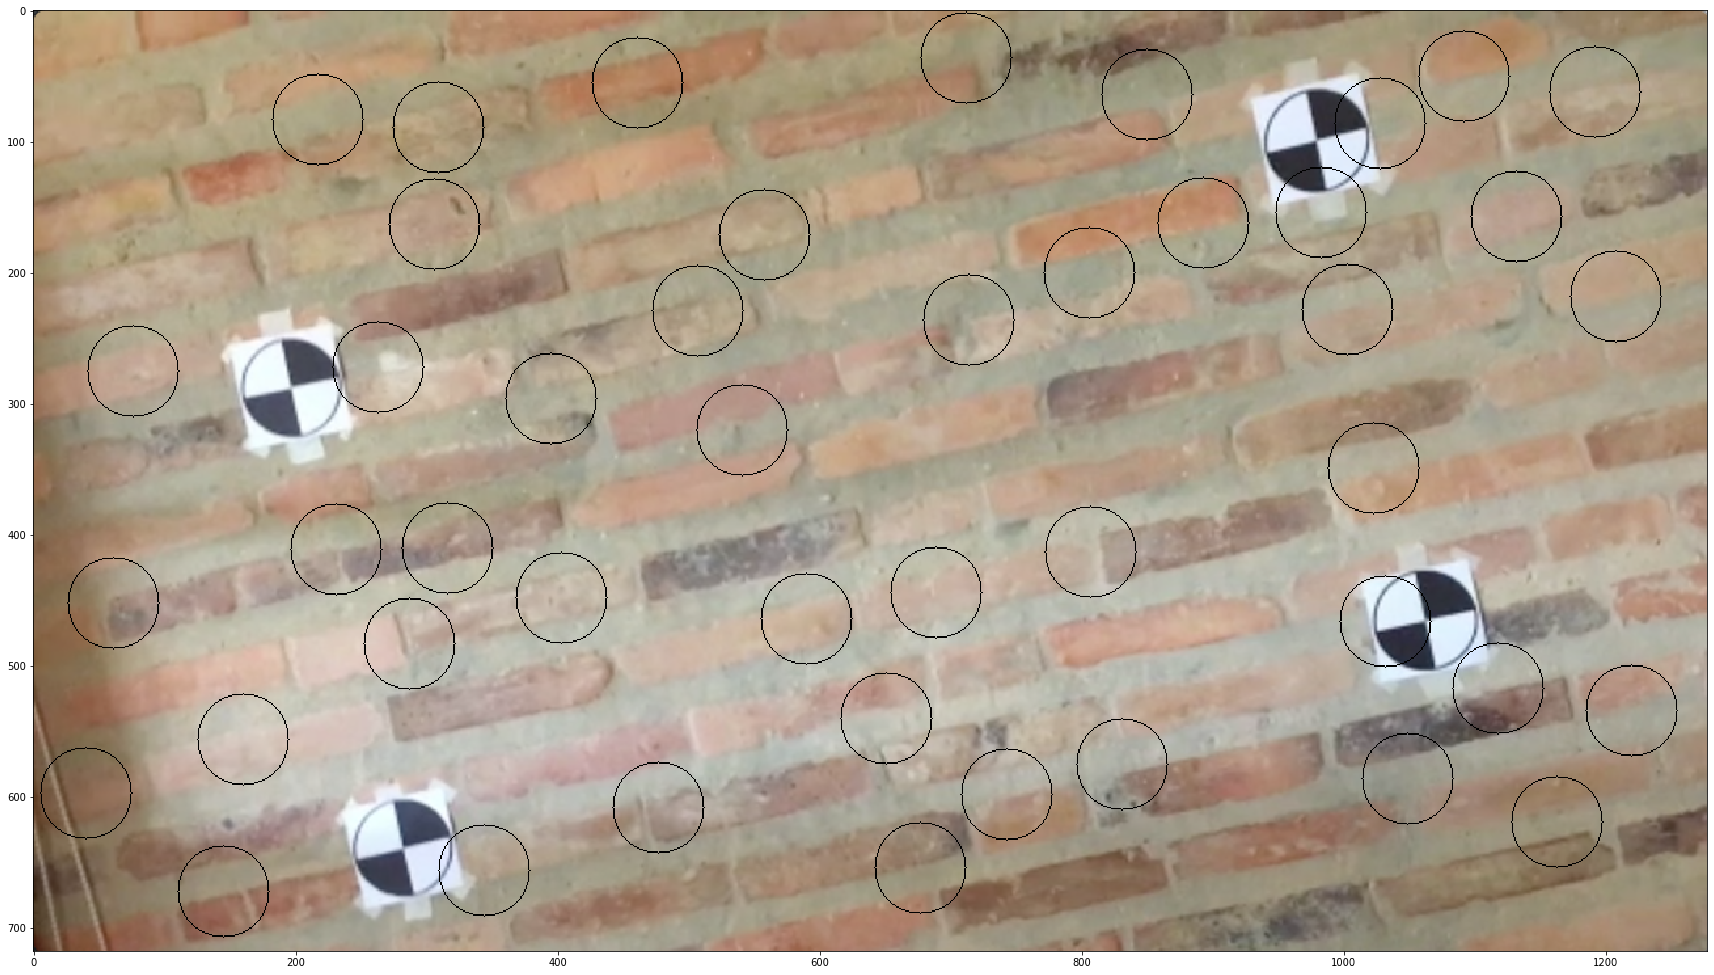

In [370]:
# img = cv2.imread('sim_clear_scene.jpg')
# img = cv2.imread('sim_noisy_scene_1.jpg')
# img = cv2.imread('sim_noisy_scene_2.jpg')
# img = cv2.imread('ps3-2-a_base.jpg')
# img = cv2.imread('ps3-2-b_base.jpg')
# img = cv2.imread('ps3-2-c_base.jpg')
img = cv2.imread('rectangle_wall_noisy.png')

print(img.shape)

plt.figure(figsize = (30, 50))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

## Gray Scaling or Averaging

In [371]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

## Harris Detector

In [382]:
harris_image = np.float32(gray_image)

# dst = cv2.cornerHarris(harris_image, 2, 3, 0.04)
# dst = cv2.cornerHarris(harris_image, 5, 7, 0.04)
dst = cv2.cornerHarris(harris_image, 10, 11, 0.137)
print(dst.shape)

results = np.where(dst>0.15*dst.max())
# print("results: ", results)

markers = []
for marker in zip(*results[::-1]):
    x = marker[0]
    y = marker[1]
    markers.append((x, y))
    
print("length: ", len(markers))

(718, 1278)
length:  1383


## Draw

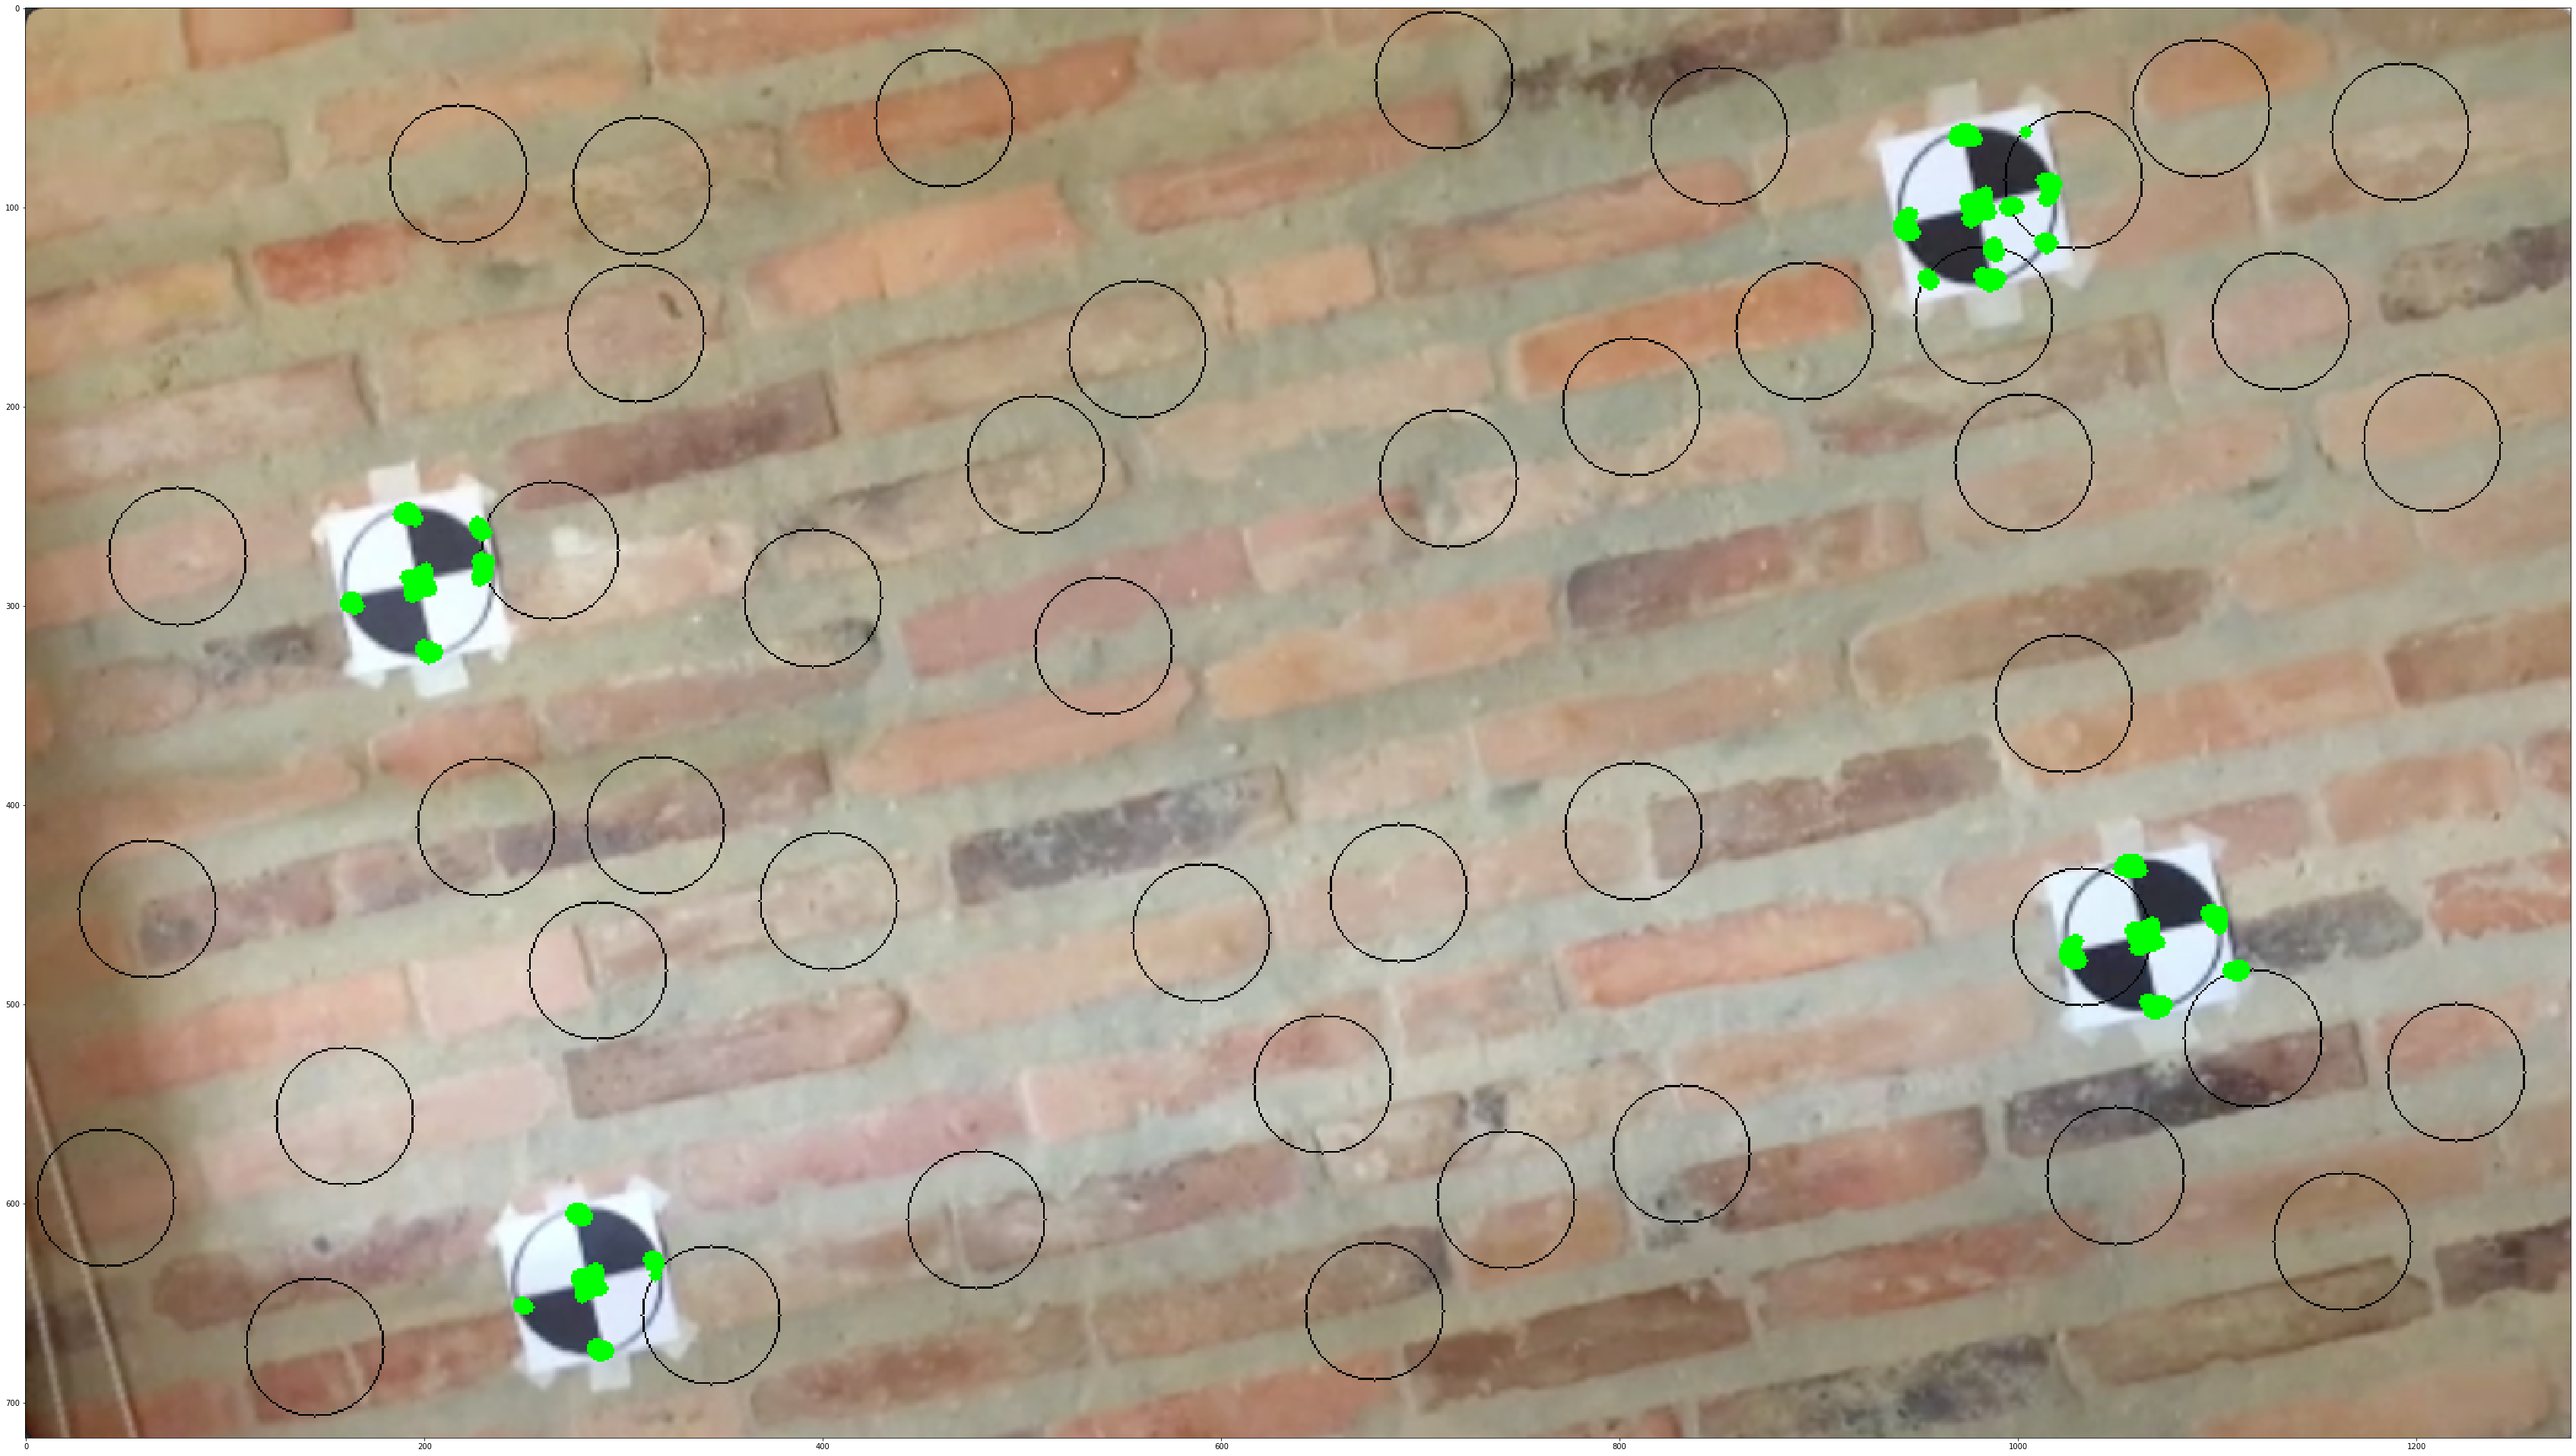

In [383]:
marked_img = np.copy(img)

for pt in markers:
    cv2.circle(marked_img, pt, 3, (0, 255, 0), -1)
    
plt.figure(figsize = (60, 100))
plt.imshow(cv2.cvtColor(marked_img, cv2.COLOR_BGR2RGB))
plt.show()

## Cluster

In [384]:
markers_float32 = np.array(markers, dtype='float32')

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# Set flags (Just to avoid line break in the code)
flags = cv2.KMEANS_RANDOM_CENTERS

# Apply KMeans
compactness,labels,centers = cv2.kmeans(markers_float32, 4, None, criteria,10,flags)

print(centers)

markers_clustered = [tuple(x) for x in centers.astype(np.uint16).tolist()]

print(markers_clustered)

[[ 284.60776  638.9181 ]
 [ 201.62987  284.97726]
 [1065.6372   467.66245]
 [ 981.4395   103.287  ]]
[(284, 638), (201, 284), (1065, 467), (981, 103)]


In [385]:
markers_float32.shape

(1383, 2)

# Draw clustered points

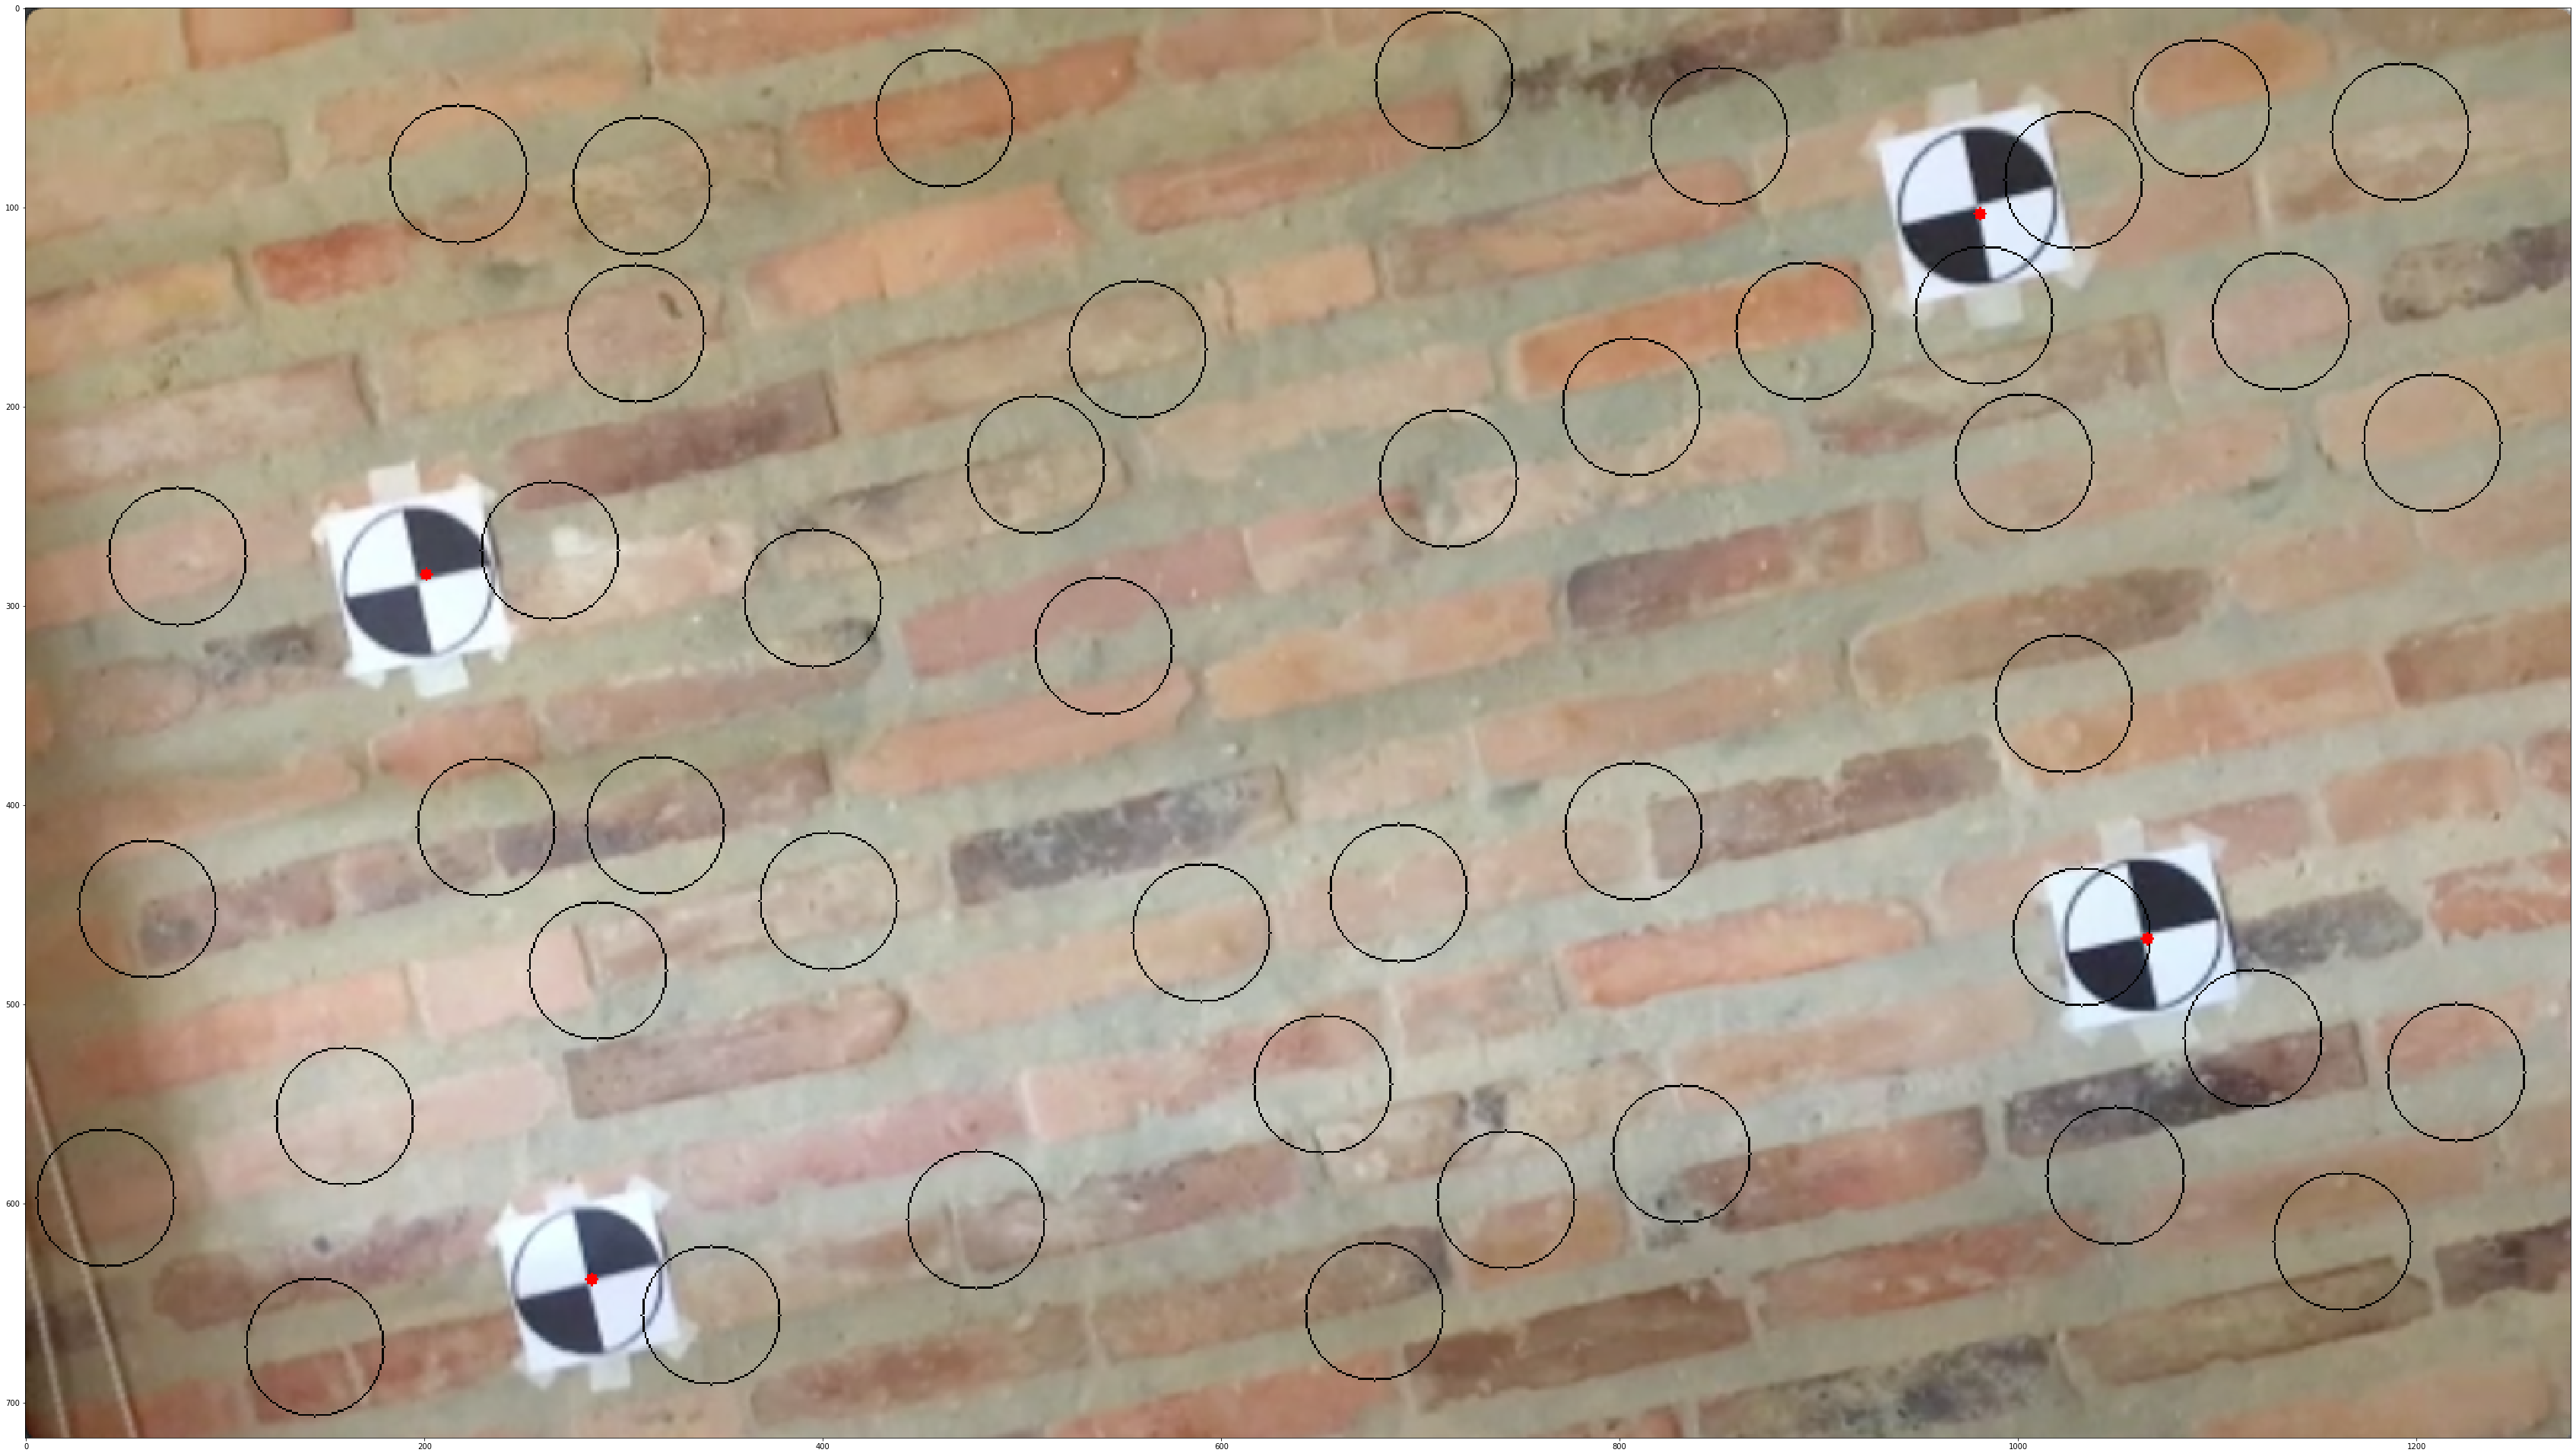

[(284, 638), (201, 284), (1065, 467), (981, 103)]


In [386]:
marked_img = np.copy(img)
# for pt in zip(*loc[::-1]):
for pt in markers_clustered:
    cv2.circle(marked_img, pt, 3, (0, 0, 255), -1)
    
plt.figure(figsize = (60, 100))
plt.imshow(cv2.cvtColor(marked_img, cv2.COLOR_BGR2RGB))
plt.show()
print(markers_clustered)